### test

In [23]:
!pwd

import numpy as np
import netCDF4 as nc
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr


/home/users/train013


In [39]:
!git clone https://github.com/pearseb/CMIP6_hackathon ~/CMIP6_hackathon

Cloning into '/home/users/train013/CMIP6_hackathon'...


In [4]:
x = np.linspace(0,100,1000)
y = np.linspace(0,1,1000)
xlog = np.log10(x)

<ipython-input-4-951ef933cb3e>:3: RuntimeWarning: divide by zero encountered in log10
  xlog = np.log10(x)


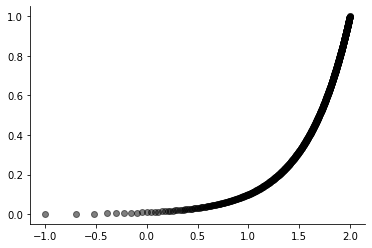

In [6]:
plt.figure()
gs = GridSpec(1,1)

ax1 = plt.subplot(gs[0])
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.scatter(xlog,y, marker='o', alpha=0.5, color='k')

In [19]:
data = nc.Dataset('/badc/cmip6/data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Amon/tas/gn/files/d20191128/tas_Amon_ACCESS-ESM1-5_historical_r2i1p1f1_gn_185001-201412.nc')
tas = data.variables['tas'][...]
lon = data.variables['lon'][...]
lat = data.variables['lat'][...]

print(np.shape(tas))
print(np.shape(lon))
print(np.shape(lat))

(1980, 145, 192)
(192,)
(145,)


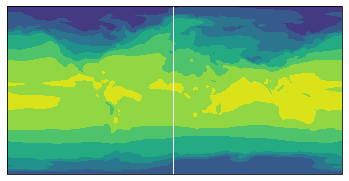

In [18]:
plt.figure()
gs = GridSpec(1,1)

ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
plt.contourf(lon,lat,tas[0,:,:], transform=ccrs.PlateCarree())


In [22]:
data = xr.open_dataset('/badc/cmip6/data/CMIP6/CMIP/CSIRO/ACCESS-ESM1-5/historical/r2i1p1f1/Amon/tas/gn/files/d20191128/tas_Amon_ACCESS-ESM1-5_historical_r2i1p1f1_gn_185001-201412.nc')
data

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    tas        (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  29220.0
    creation_date:          2019-11-28T02:16:35Z
    ...                     ...
    variable_id:            tas
    variant_label:          r2i1p1f1
    version:                v20191128
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/cea38f36-270b-4a55-8bad-5837ffe16727
    license:                CMIP6 model data produced by CSIRO is licensed un...

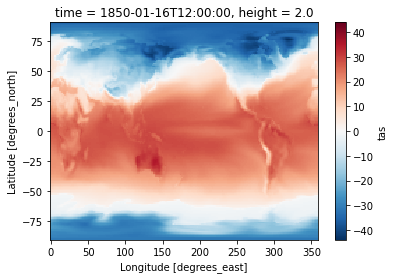

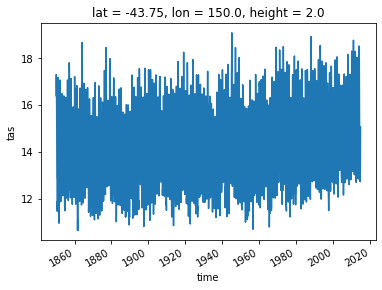

In [38]:
layer = data.tas.sel(time="1850-01-16T12:00:00.000000000").squeeze() - 273.15
layer = data.tas.isel(time=0).squeeze() - 273.15
tasmania = data.tas.sel(lon="150",lat="-43.75") - 273.15

layer.plot()
plt.show()

tasmania.plot()
plt.show()

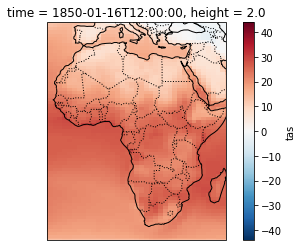

In [31]:
plt.figure()
gs = GridSpec(1,1)

ax1 = plt.subplot(gs[0], projection=ccrs.PlateCarree())
ax1.set_extent([-20,50,-40,45], crs=ccrs.PlateCarree())
ax1.add_feature(cfeature.BORDERS, linestyle=':')
ax1.coastlines()

layer.plot()
plt.show()